Labraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloaded and showed data

In [ ]:

data = pd.read_csv('data.csv')


print(data.head())
print(data.columns)

                  date  carbune  consum  hidro  hidrocarburi  nuclear  eolian  \
0  2024-10-20 08:55:19      600    5274   1443          1042     1372     153   
1  2024-10-19 21:00:13      603    6901   2046          1098     1365     219   
2  2024-10-19 07:55:27      607    5959   1880          1096     1379     468   
3  2024-10-18 21:17:15      831    7143   2047          1087     1364     312   
4  2024-10-18 08:22:10      841    7098   2219          1068     1367     657   

   productie  fotovolt  biomasa  sold  
0       4903       227       55   370  
1       5390        -1       59  1510  
2       5495         6       56   464  
3       5689        -2       55  1453  
4       6357       118       56   741  
Index(['date', 'carbune', 'consum', 'hidro', 'hidrocarburi', 'nuclear',
       'eolian', 'productie', 'fotovolt', 'biomasa', 'sold'],
      dtype='object')


# ***Анализ и визуализация данных по видам энергии за месяц***

<ipython-input-18-bc1f67ba7f3b>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()


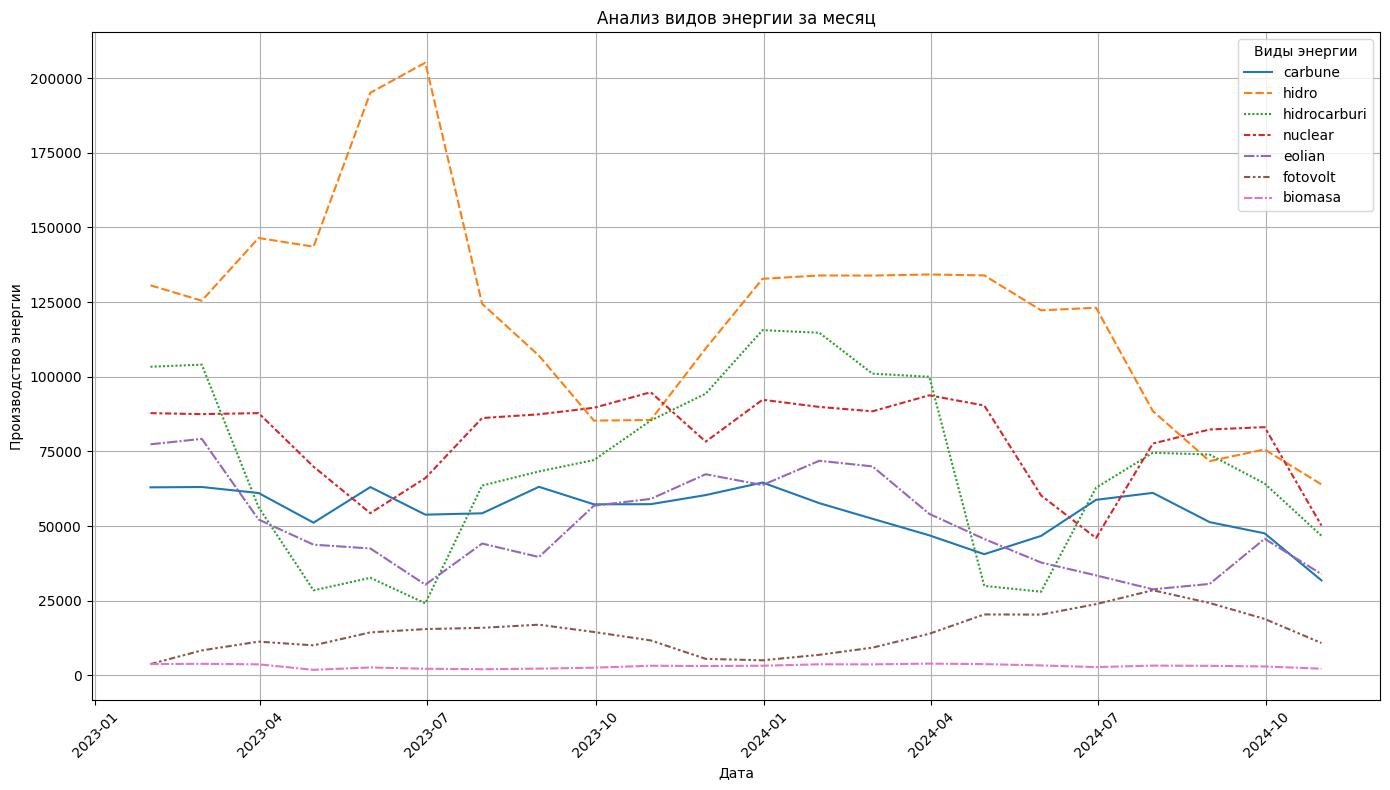

In [ ]:
data['date'] = pd.to_datetime(data['date'])


data.set_index('date', inplace=True)


monthly_data = data.resample('M').sum()


plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_data[['carbune', 'hidro', 'hidrocarburi', 'nuclear', 'eolian', 'fotovolt', 'biomasa']], palette='tab10')
plt.title('Анализ видов энергии за месяц')
plt.xlabel('Дата')
plt.ylabel('Производство энергии')
plt.legend(title='Виды энергии')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***График баланса по дням за 2023 и 2024 гг. ***

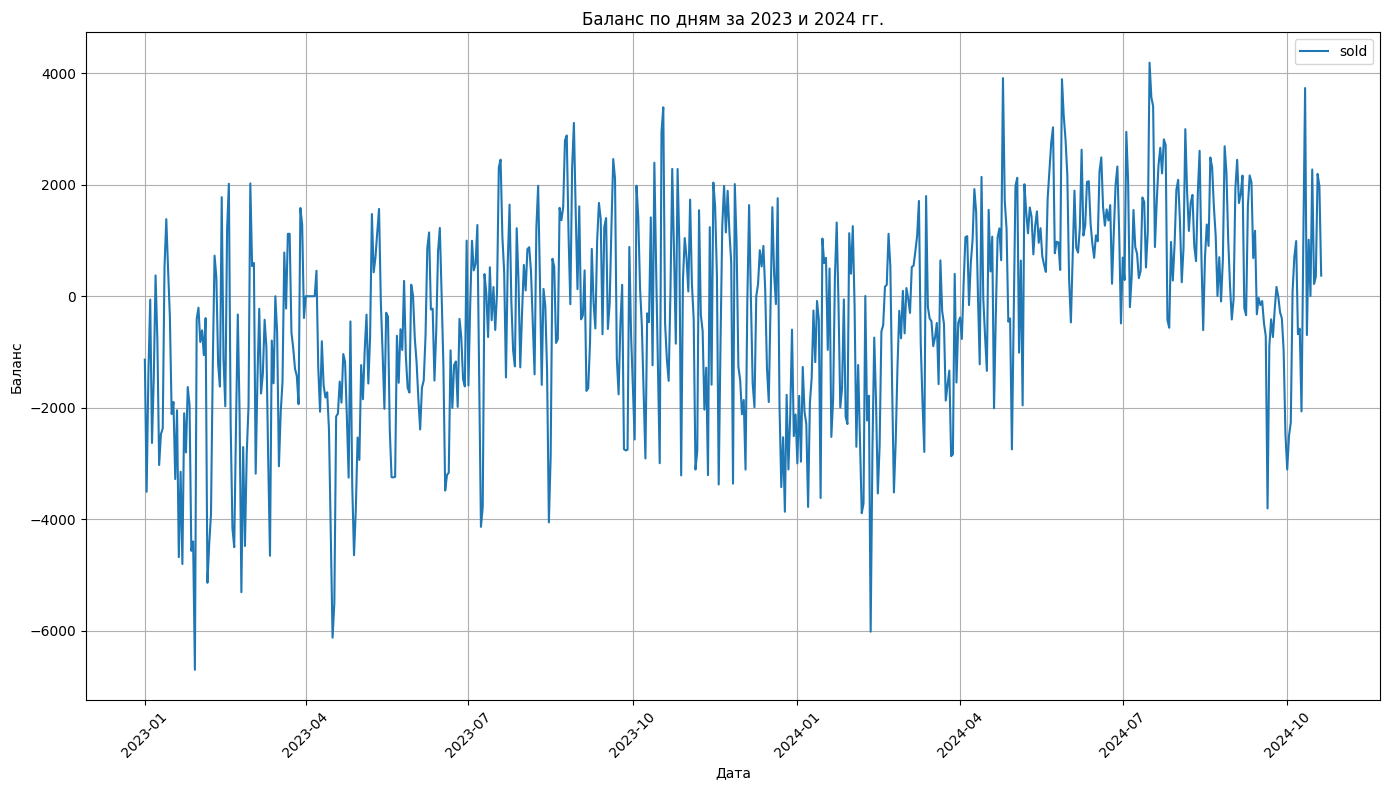

In [ ]:

data_filtered = data[(data.index.year == 2023) | (data.index.year == 2024)]

daily_balance = data_filtered[['sold']].resample('D').sum()


plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_balance, palette='tab10')
plt.title('Баланс по дням за 2023 и 2024 гг.')
plt.xlabel('Дата')
plt.ylabel('Баланс')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***График потребления по часам дням недели и по месяцам 2023 и 2024 гг. ***

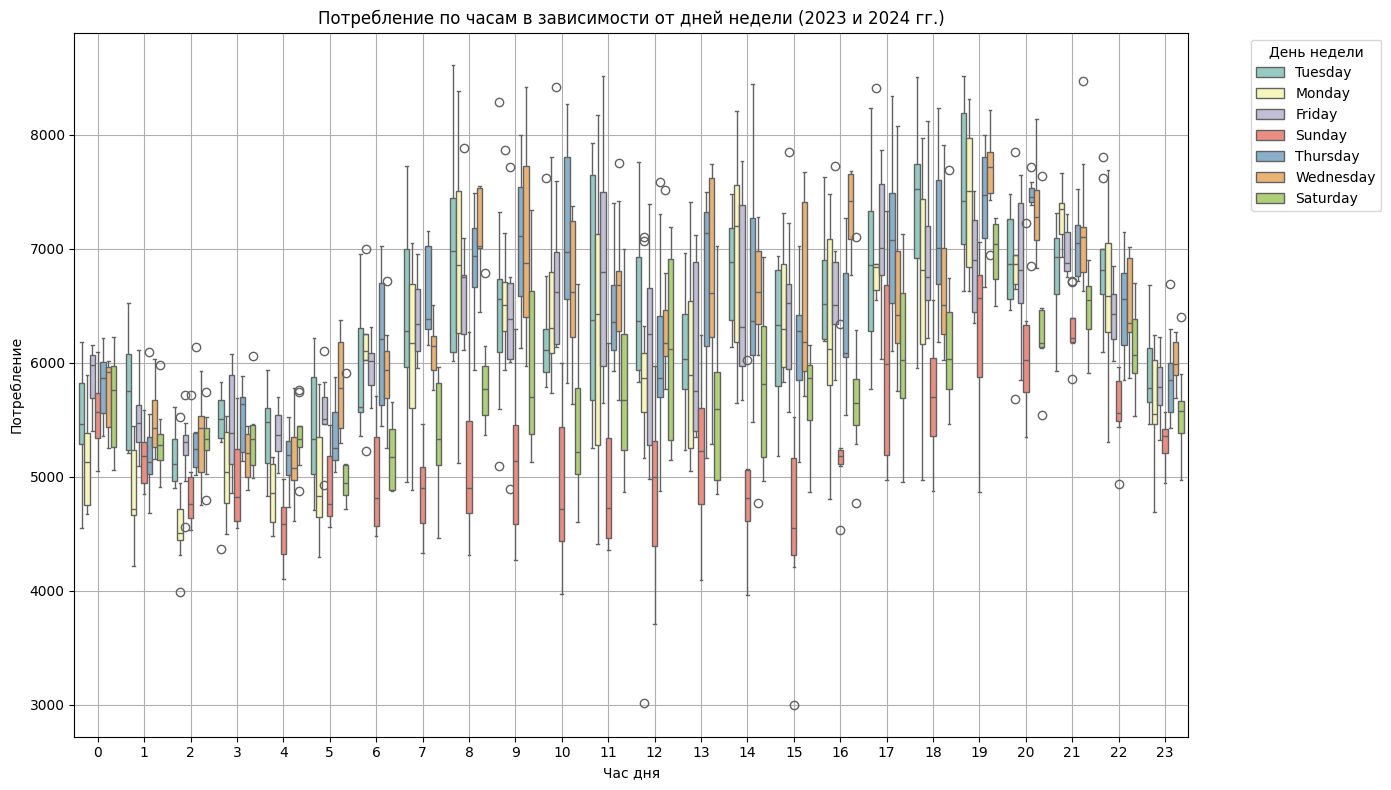

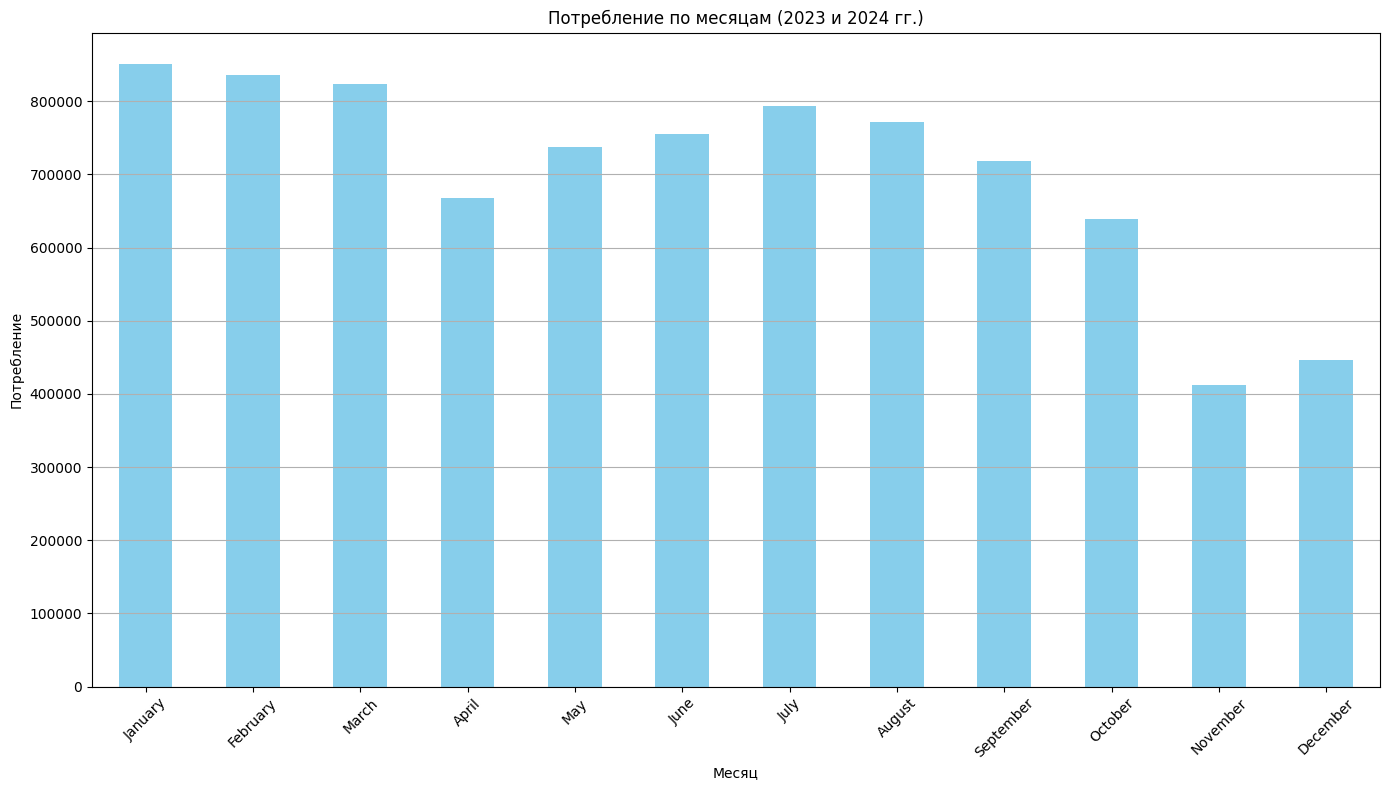

In [ ]:

data_filtered = data[(data.index.year == 2023) | (data.index.year == 2024)]


data_filtered['day_of_week'] = data_filtered.index.day_name()
data_filtered['hour'] = data_filtered.index.hour


plt.figure(figsize=(14, 8))
sns.boxplot(x='hour', y='consum', hue='day_of_week', data=data_filtered, palette='Set3')
plt.title('Потребление по часам в зависимости от дней недели (2023 и 2024 гг.)')
plt.xlabel('Час дня')
plt.ylabel('Потребление')
plt.legend(title='День недели', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


data_filtered['month'] = data_filtered.index.month_name()

monthly_consumption = data_filtered.groupby('month')['consum'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(14, 8))
monthly_consumption.plot(kind='bar', color='skyblue')
plt.title('Потребление по месяцам (2023 и 2024 гг.)')
plt.xlabel('Месяц')
plt.ylabel('Потребление')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ***Временной ряд по балансу за весь период ***

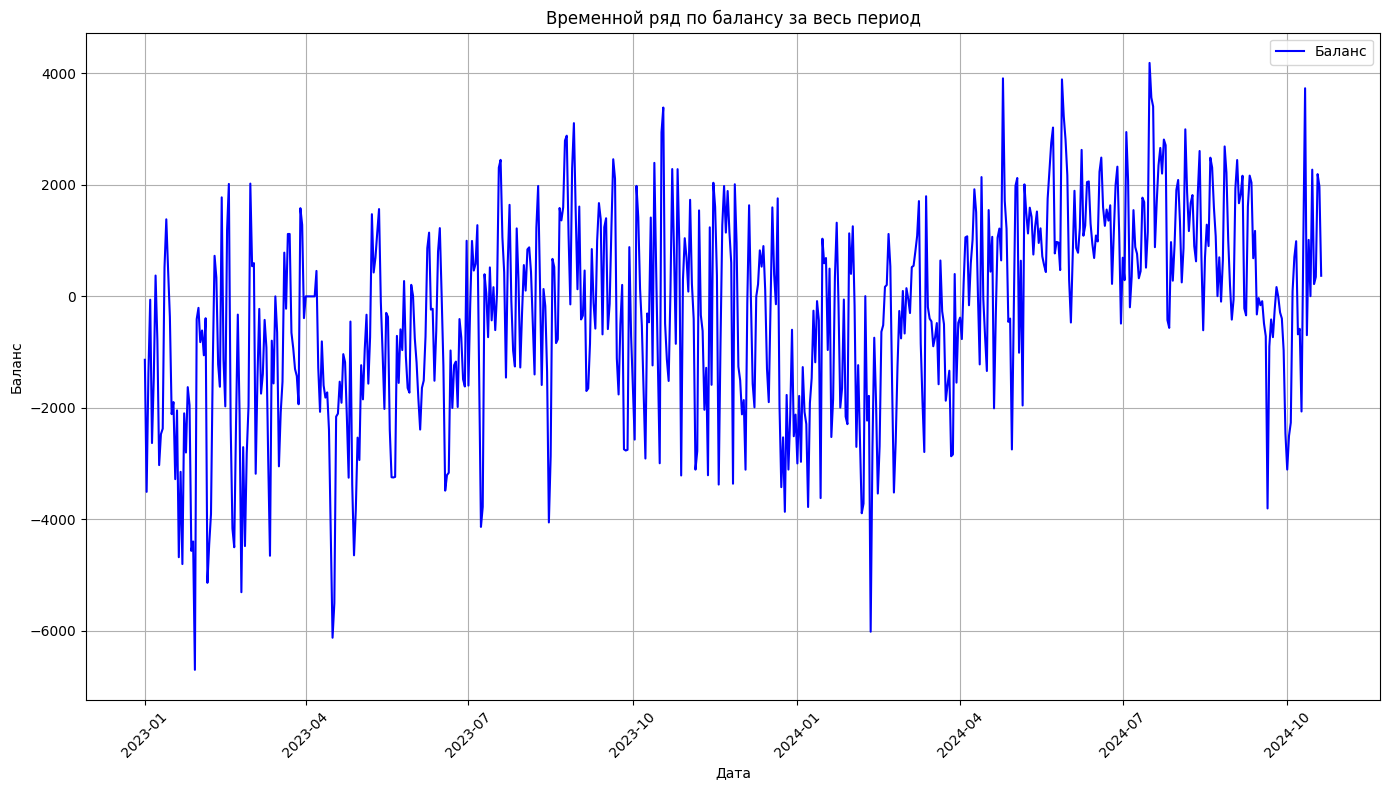

In [ ]:

plt.figure(figsize=(14, 8))
plt.plot(daily_balance.index, daily_balance['sold'], color='blue', label='Баланс')
plt.title('Временной ряд по балансу за весь период')
plt.xlabel('Дата')
plt.ylabel('Баланс')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# ***Графическое сравнение потребления с производством***

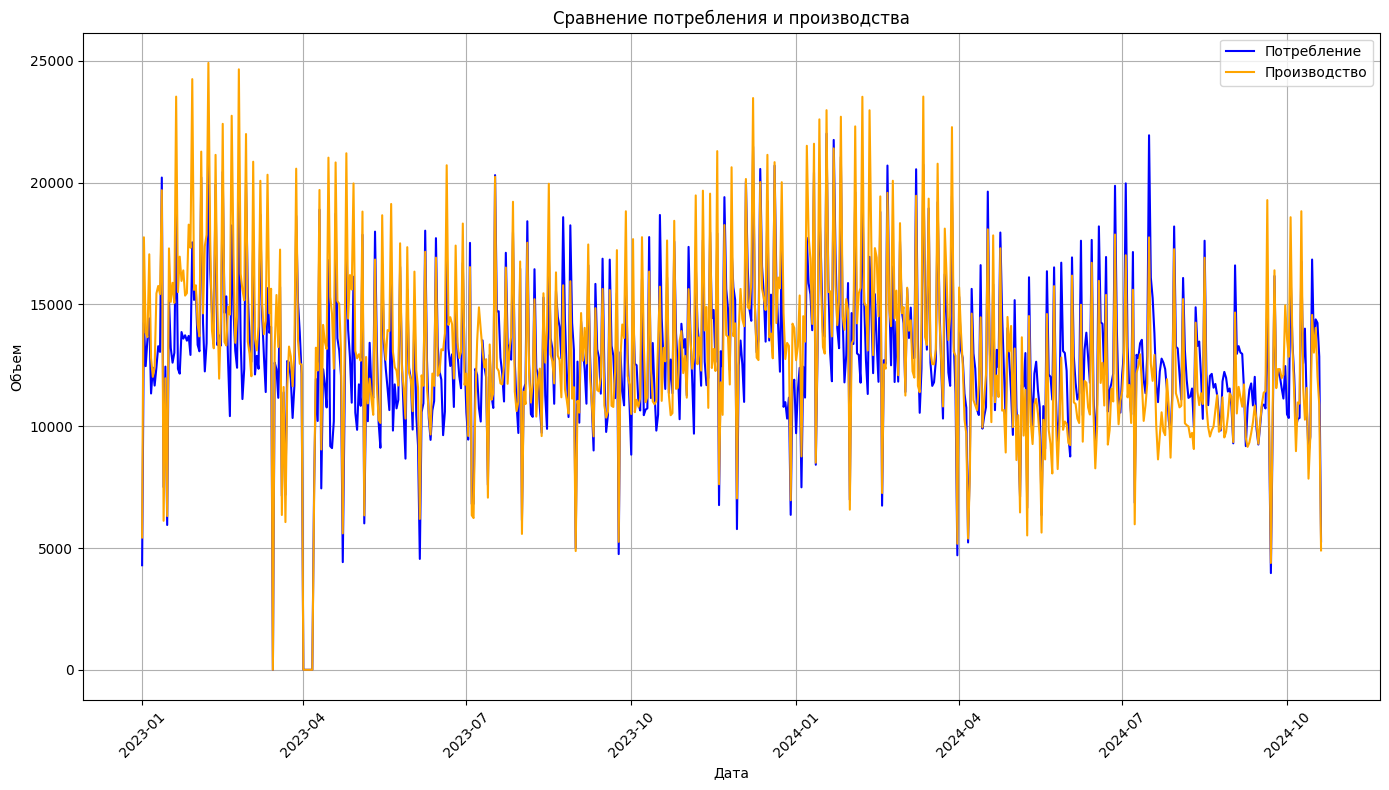

In [ ]:

daily_data = data[['consum', 'productie']].resample('D').sum()


plt.figure(figsize=(14, 8))
plt.plot(daily_data.index, daily_data['consum'], label='Потребление', color='blue')
plt.plot(daily_data.index, daily_data['productie'], label='Производство', color='orange')
plt.title('Сравнение потребления и производства')
plt.xlabel('Дата')
plt.ylabel('Объем')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Графическое сравнение 2023 и 2024 гг.***

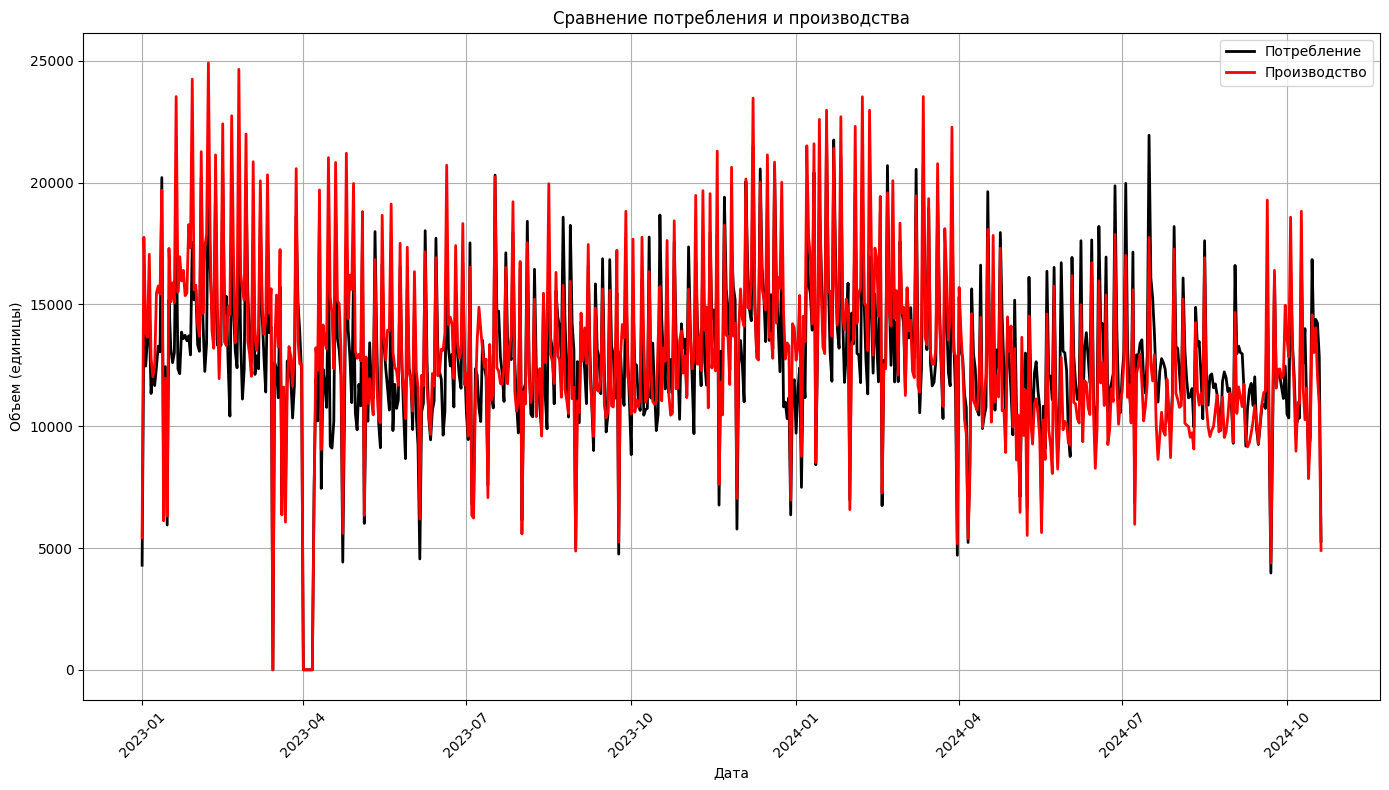

In [ ]:

daily_data = data[['consum', 'productie']].resample('D').sum()

plt.figure(figsize=(14, 8))
plt.plot(daily_data.index, daily_data['consum'], label='Потребление', color='black', linewidth=2)
plt.plot(daily_data.index, daily_data['productie'], label='Производство', color='red', linewidth=2)
plt.title('Сравнение потребления и производства')
plt.xlabel('Дата')
plt.ylabel('Объем (единицы)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()